In [1]:
#importing Libraries
import pandas as pd
import numpy as np
from numpy.random import randn

# a.) Read the data

In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
print("There are ", data.shape[0], " rows in Telco Customer Churn Data")

There are  7032  rows in Telco Customer Churn Data


Data Overview 

In [5]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# b.) Data Manipulation

In [6]:
#Data Manipulation

#Replacing spaces with null values in total charges column
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

#convert to float type
data["TotalCharges"] = data["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No'})
    
#replace values
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})


#Separating churn and non churn customers
churn     = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

# c.) Exploratory Data Analysis

In [7]:
# import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

# settings

sns.set()
%matplotlib inline

1. Explore the customer churn (target variable)

First, let's explore the target, 'Churn'. The countplot below gives us a first impression of the amount of customers who didn't churn in relation to the amount of customers who actually churned. We observe that there are much more customer who didn't churn in comparison to the amount of customer who actually churned.

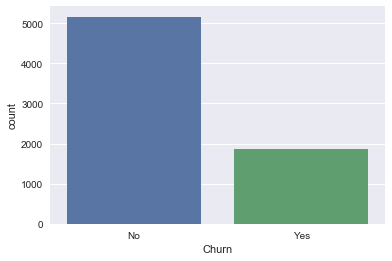

In [8]:
# countplot of Churn

sns.countplot(data['Churn'])
plt.show()

In [9]:
# amount of customers who didn't churn and who churned

data.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

More precisely, in the cleaned version of our data, there are 5163 customers who didn't churn and 1869 customers who churned. 

In [10]:
# churn rate

churn_rate = data.groupby('Churn').size()[1]/data.Churn.count()
print('Churn rate: %.2f%%' % (churn_rate * 100.0))

Churn rate: 26.58%


To express the class distribution differently, we can calculate the churn rate, i.e. the relation of customers who stop subscribing to telcom service . It is about 27%.

2. Exploring the Categorical Features 

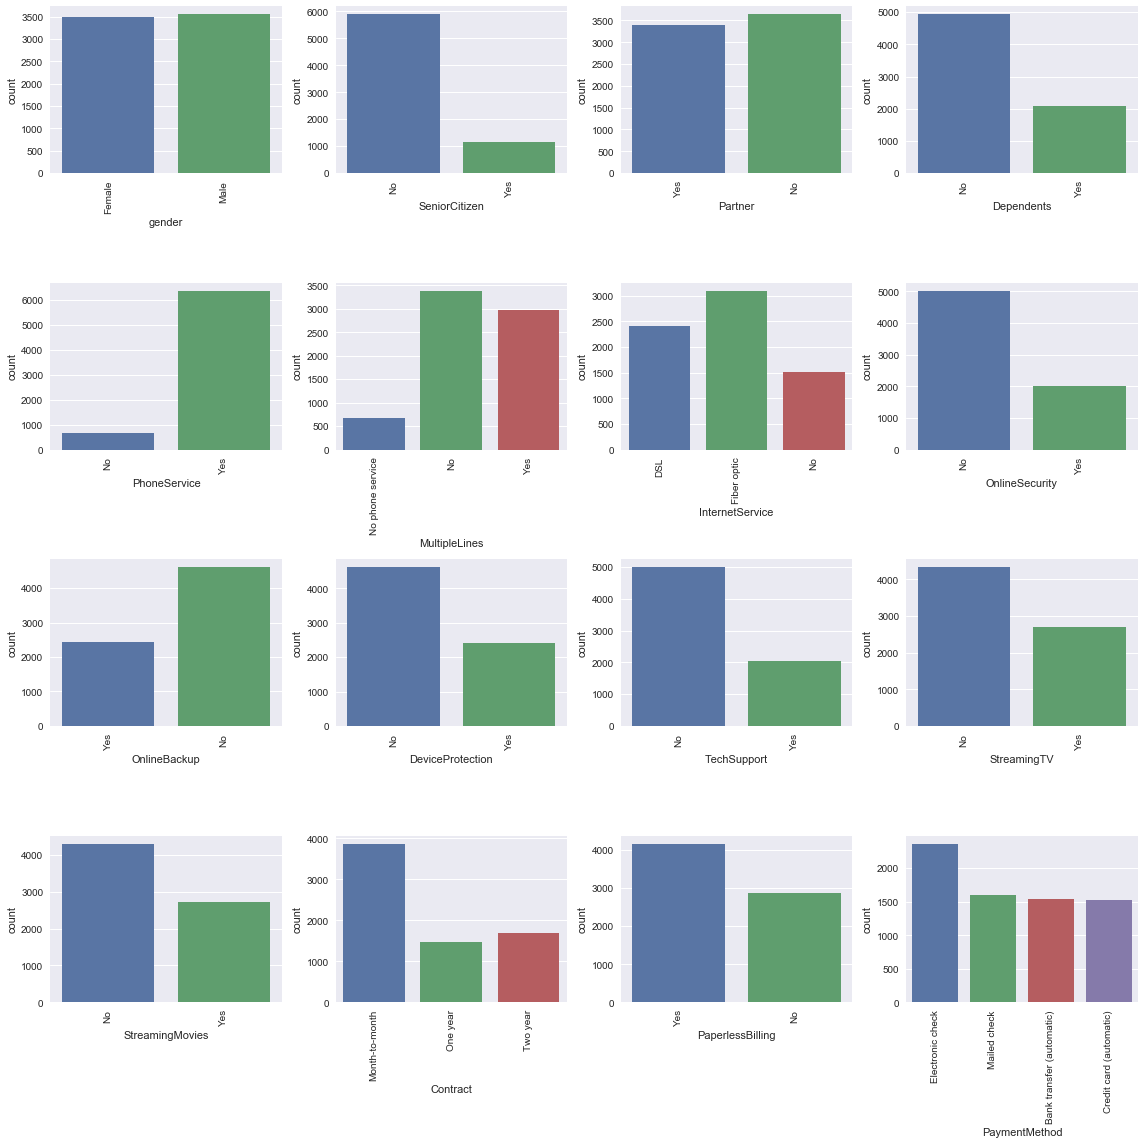

In [11]:
# countplots of all categorical features

data_cat_features = data[['gender', 
                        'SeniorCitizen',
                        'Partner', 
                        'Dependents', 
                        'PhoneService', 
                        'MultipleLines', 
                        'InternetService', 
                        'OnlineSecurity', 
                        'OnlineBackup', 
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV', 
                        'StreamingMovies',
                        'Contract',
                        'PaperlessBilling',
                        'PaymentMethod']].copy()

plt.figure(figsize=(16,16))
for i in range(0,16):
        plt.subplot(4,4,i+1)
        sns.countplot(data_cat_features.iloc[:,i])
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We observe that:

-There is about an equal amount of female and male customers

-There are much less senior citizens than there are citizens who are not senior

-Partner is equally distributed

-There are much more cases where 'Dependents' takes on the value 'No' compared to the amount of cases where 'Dependents' takes on the value 'Yes'

-Most customers have phone service included in their contracts

-There is about an equal amount of customers who have only one line and customers who have multiple lines

-Many customers have internet service included in their contracts and more customers have fiber optic than DSL

-Of those customers who have internet service included, most don't have internet security

-Of those customers who have internet service included, more don't have online backup than have online backup

-Of those customers who have internet service included, more don't have device protection than have device protection

-Of those customers who have internet service included, more don't have tech support than have tech support

-Of those customers who have internet service included, the amount of those who have and have not streaming TV 
included is almost equal

-Of those customers who have internet service included, the amount of those who have and have not streaming movies included is almost equal

-Most customers have month-to-month contracts, while the amount of customers who have one-year or two-year contracts is about equal

-There are more customers who have paperless billing

-Most customers use electronic check as their payment method, while the amount of customers who use mailed check, bank transfer or credit card is about equal

Next, we explore whether there are differences in regard to whether a customer churned or not across the different values of all categorical features.

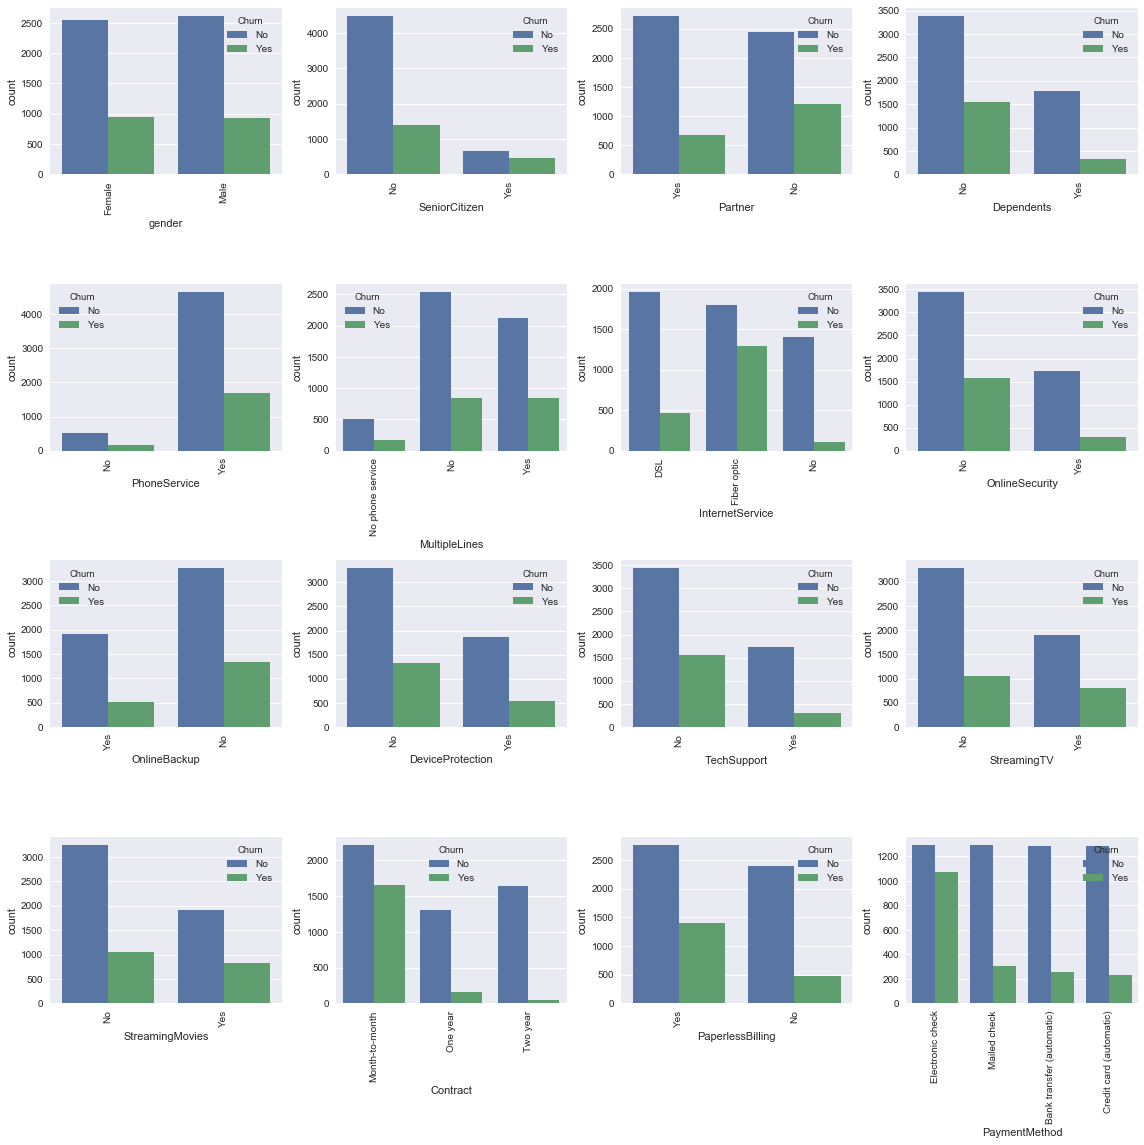

In [12]:
# countplots of all categorical features by Churn

plt.figure(figsize=(16,16))
for i in range(0,16):
        plt.subplot(4,4,i+1)
        sns.countplot(data_cat_features.iloc[:,i], hue=data['Churn'])
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We observe the following:

-'gender': there is about an equal amount of female and male customers who churned

-'SeniorCitizen': a high number of senior citizens churned

-'InternetService': among those customers who have fiber optic many more churned than among those who have DSL

-'OnlineSecurity': among those customer who have no online security many more churned than among those who have online security

-'OnlineBackup': among those customer who don't have online backup many more churned than among those who have online backup

-'DeviceProtection': among those customer who don't have device protection many more churned than among those who have device protection

-'TechSupport': among those customer who don't have tech support many more churned than among those who have tech support

-'StreamingTV': the amount of customers who churned is about equally distributed across those customers who have and who don't have streaming TV

-'StreamingMovies': the amount of customers who churned is about equally distributed across those customers who have and who don't have streaming movies

-'Contract': most customers who churned have month-to-month contracts

-'PaperlessBilling': most customers who churned use paperless billing

-'PaymentMethod': most customers who churned use electronic check

From these observations one hypothesis we might conclude is that customers who are less engaged with telco provider, i.e. have less services included in their contracts and have month-to-month contracts for instance, are more likely to churn. 

3.Exploring the Numerical Features

There are 3 numerical features in our data, namely 'tenure', 'MonthlyCharges', and 'TotalCharges'. Below are some summary statistics for these features. 

In [13]:
# summary statistics for numerical features

data.describe().iloc[:,]

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The average 'tenure' is about 32 years, the average 'MonthlyCharges' about 65 dollars, and the average 'TotalCharges' about 2283 dollars.

Below is a heatmap of the numerical features. One observation is that 'tenure' is correlated with 'TotalCharges', which makes sense because the longer a contract exists, the higher the total amount paid for that contract.

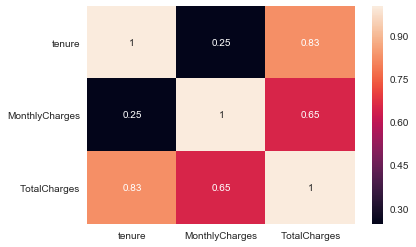

In [14]:
# heatmap of correlations of the numeric features

corr = data.corr() 
sns.heatmap(corr, annot=True)
plt.show()


Let us explore the outliers using boxplot

Below are boxplots for 'MonthlyCharges' and 'TotalCharges'. They convey information on the distribution of the values of numerical variables, e.g. mean, quartiles and outliers. There are outliers on both ends for 'MonthlyCharges' and predominantely on the upper end for 'TotalCharges'. 

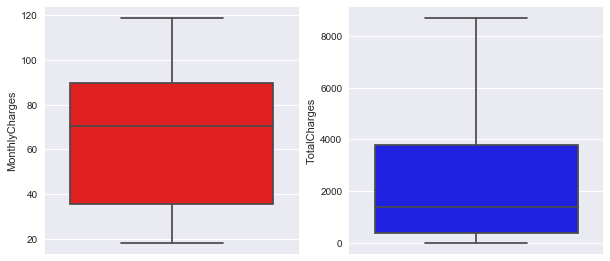

In [15]:
# boxplots of MonthlyCharges and TotalCharges

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data['MonthlyCharges'], orient='vertical', color='red')
plt.subplot(2,2,2)
sns.boxplot(data['TotalCharges'], orient='vertical', color='blue')
plt.show()

Below are histograms for 'MonthlyCharges' and 'TotalCharges'. They convey information on how the values of a variable are distributed in terms of frequency. We oberve that there are many 'MonthlyCharges' around 20 dollars and another large group between around 70 and 100 dollars. 'MonthlyCharges' between 20 and 70 dollars, however, seem to be less frequent.

The frequency of large 'TotalCharges' appears to decrease as 'TotalCharges' increases, which makes sense generally as for 'TotalCharges' to be large a customer has to have their contract for quite a long time which doesn't happen very often.

Overall we can conclude that neither 'MonthlyCharges' nor 'TotalCharges' appear to be normally distributed.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


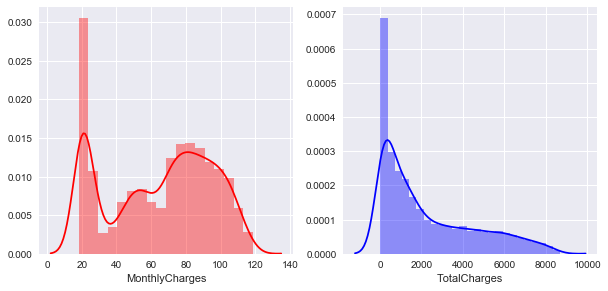

In [16]:
# histograms of MonthlyCharges and TotalCharges

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['MonthlyCharges'], kde=True, color='red')
plt.subplot(2,2,2)
sns.distplot(data['TotalCharges'], kde=True, color='blue')
plt.show()

Below is a boxplot for 'tenure' that shows that there are some outliers on both ends.

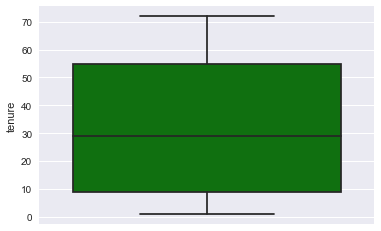

In [17]:
# boxplot of tenure

sns.boxplot(data['tenure'], orient='vertical', color='green')
plt.show()

Below is a histogram of 'tenure'. There appear to be many contracts that didn't last long and the amount of longer contracts appears to decrease with contract length. Interestingly, there appears to be a peak in the frequency of contracts that are around 70 years in length.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


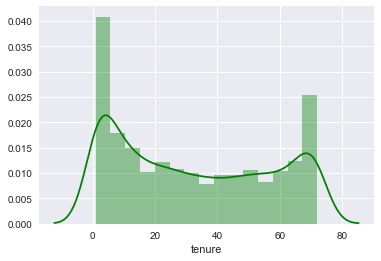

In [18]:
# histogram of tenure

sns.distplot(data['tenure'], kde=True, color='green')
plt.show()

Numeric features in relation to target Churn

First, for each numeric feature we have, 'MonthlyCharges', 'TotalCharges', and 'tenure', we create a function that maps the values of each numeric variable to a specific group (low, lower medium, upper medium or high) based on the first, second, third, and fourth quartiles of each numeric variable, respectively. We then, in turn, apply this function to each numeric variable to create a new column for each numeric variable in our data frame that represents to which group each instance in our data belongs, respectively. Finally, we create a countplot of the groups for each numeric variable and the amount of customers who did and who didn't churn.



Let's consider 'MonthlyCharges'. We observe that most customers fall into the low group, followed by the lower medium group. The upper medium group contains less customers than the high group and both contain less customers than the low and the lower medium group. Interestingly, the amount of customers who churned appears to increase with monthly charges group and slightly falls off again when the high group is reached. This implies that the higher a customer's monthly charge, the less likely he is to churn. This fits to the observation we made before: the more engaged a customer, i.e. the more services are included in the contract, the less likely he is to churn. And in turn, the more services are included in the contract, the higher the monthly charge.

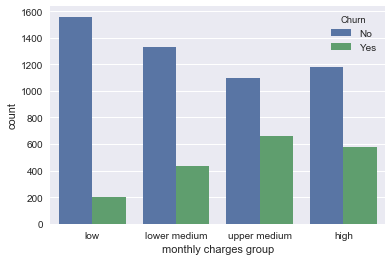

In [19]:
# function to map values of tenure to different groups based on quartiles

def monthly_charges_group(row):
    if row['MonthlyCharges'] <= data.MonthlyCharges.quantile(0.25):
        return 'low'
    elif row['MonthlyCharges'] <= data.MonthlyCharges.quantile(0.5):
        return 'lower medium'
    elif row['MonthlyCharges'] <= data.MonthlyCharges.quantile(0.75):
        return 'upper medium'
    else:
        return 'high'

# create new column containing the group information based on quartiles 

data['monthly charges group'] = data.apply(monthly_charges_group, axis=1)

# countplot of monthly charges groups by Churn

sns.countplot(data['monthly charges group'], hue=data['Churn'], order=['low', 'lower medium', 'upper medium', 'high'])
plt.show()


Second, let's consider 'TotalCharges'. Here, most customer falls into the high group. There is almost an equal amount of customers in the lower medium and upper medium groups, while the least customers are in the low group. The amount of customers who churned appears to decrease with the total charges group. This means that the higher a customer's total charges, the less likely he is to churn, i.e. a customer that has a high total charge has been with the telco provider for quite some time and appears to be loyal.

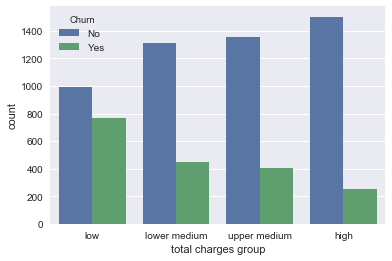

In [20]:
# function to map values of tenure to different groups based on quartiles

def total_charges_group(row):
    if row['TotalCharges'] <= data.TotalCharges.quantile(0.25):
        return 'low'
    elif row['TotalCharges'] <= data.TotalCharges.quantile(0.5):
        return 'lower medium'
    elif row['TotalCharges'] <= data.TotalCharges.quantile(0.75):
        return 'upper medium'
    else:
        return 'high'
    
# create new column containing the group information based on quartiles 
    
data['total charges group'] = data.apply(total_charges_group, axis=1)

# countplot of total charges groups by Churn

sns.countplot(data['total charges group'], hue=data['Churn'], order=['low', 'lower medium', 'upper medium', 'high'])
plt.show()


Lastly, we consider 'tenure'. The amount of customers per group steadily increases with the tenure group, while the amount of customers who churned decreases with the tenure group. There are only few customers who churned in the high group, but almost all customers in the low group churned. This implies that the longer a customer's tenure, the less likely he is to churn. Same argument as above: loyal customers who have been with the telco provider for quite some time tend to be less likely to churn.

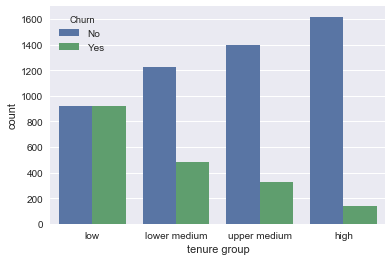

In [21]:
# function to map values of tenure to different groups based on quartiles

def tenure_group(row):
    if row['tenure'] <= data.tenure.quantile(0.25):
        return 'low'
    elif row['tenure'] <= data.tenure.quantile(0.5):
        return 'lower medium'
    elif row['tenure'] <= data.tenure.quantile(0.75):
        return 'upper medium'
    else:
        return 'high'
    
# create new column containing the group information based on quartiles 

data['tenure group'] = data.apply(tenure_group, axis=1)

# countplot of tenure groups by Churn

sns.countplot(data['tenure group'], hue=data['Churn'], order=['low', 'lower medium', 'upper medium', 'high'])
plt.show()

Let us check data before we start modelling

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly charges group,total charges group,tenure group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low,low,low
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,lower medium,upper medium,upper medium
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,lower medium,low,low
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,lower medium,upper medium,upper medium
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,upper medium,low,low


Drop columns that don't provide any value for modelling

Since the 'customerID' column doesn't convey useful information for the exploratory analysis or the modeling we can drop it.

In [23]:
# drop customerID

data = data.drop(['customerID', 'monthly charges group', 'total charges group','tenure group'], axis = 1)

In [24]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# d.) Modelling

Pre-processing

Before we can start building our prediction model, we need to do some preprocessing. First, we create a copy of our original data frame to encode the categorical features and our target', so that our model can process them later on.

In [25]:
# copy data to create df_enc to encode categorical features and the target

data_enc = data.copy()

Then we encode our target, 'Churn', using a binary label encoder.

In [26]:
# encode target

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data_enc['Churn'])
data_enc['Churn'] = le.transform(data_enc['Churn'])

Next, we encode our categorical features using one hot encoding.

In [27]:
# encode categorical features

categorical_features = ['gender', 
                        'SeniorCitizen',
                        'Partner', 
                        'Dependents', 
                        'PhoneService', 
                        'MultipleLines', 
                        'InternetService', 
                        'OnlineSecurity', 
                        'OnlineBackup', 
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV', 
                        'StreamingMovies',
                        'Contract',
                        'PaperlessBilling',
                        'PaymentMethod']

data_enc = pd.get_dummies(data_enc, columns=categorical_features, drop_first=True)


Then we split our features and our target into different objects called X for the features and y for the target

In [28]:
# split encoded categorical features and encoded target into X and y

X = data_enc.drop('Churn', axis=1)
y = data_enc['Churn']

Now we split X and y in training and test sets. Our model will be trained on the training set and we will make predictions on the test set.

In [29]:
# split X and y in training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Since the numerical features in our data all have different scales it might make sense to transform them in a way that they all are on the same scale. First, we create copies of X_train and X_test and second, we use a standard scaler to scale the numerical features so that they have a mean of zero and a standard deviation of one.

In [30]:
# copy numerical features from X_train and X_test to create X_train_scaled and X_test_scaled for scaled numerical features

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [31]:
# scale numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_train_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_train_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']])

Let's have a look at our training and test features after we have encoded the categorical features and scaled the numerical features.

In [32]:
# encoded and scaled train features

X_train_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5758,1.325456,-0.161316,0.679395,0,0,1,0,1,0,0,...,0,1,1,0,0,1,1,1,0,0
5352,-1.152524,-1.469930,-0.967341,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
5736,1.162966,-1.343719,-0.365667,0,0,1,1,1,0,1,...,0,0,0,0,0,1,1,0,0,1
6056,1.081721,-1.317148,-0.336787,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
229,0.594249,0.685630,0.811653,0,0,1,1,1,0,1,...,0,1,1,1,0,1,1,1,0,0


In [33]:
# encoded and scaled test features

X_test_scaled.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2476,1.162966,-1.317148,-0.340657,1,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
6773,-0.543184,-1.327112,-0.798795,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6116,-0.786920,1.248600,-0.403790,1,0,1,0,1,0,1,...,1,0,1,1,0,0,1,1,0,0
3047,0.188023,-0.319080,-0.106701,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4092,-1.071278,-1.169348,-0.933419,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Use Prediction Model

**Logistic Regression**

Now it's time to build our prediction model. We will use a Logistic Regression since it is a linear model 

First, we create an instance of the model, then we fit it to our features and target from the training set.

In [34]:
from sklearn.linear_model import LogisticRegression

# fit the model to the training set

LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

# make predictions on the test set

y_pred = LR.predict(X_test_scaled)

# e.) Calculate Model Performance

In [35]:
# evaluate model

from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('\n')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('AUC: %.2f' % auc(fpr, tpr))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report')
print(classification_report(y_test, y_pred))

Accuracy: 80.01%


AUC: 0.72


Confusion matrix
[[1528  183]
 [ 281  329]]


Classification report
             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1711
          1       0.64      0.54      0.59       610

avg / total       0.79      0.80      0.79      2321




The accuracy of our model is 80.05%.

The Area Under Curve(AUC) is 0.72, which is another measure of model performance - the bigger the better (max=1).


Another useful tool to assess the performance of a model is the confusion matrix. The confusion matrix below shows how many predictions were correct and how many were incorrect.

**True negatives:** In the upper left are the 'true negatives', i.e. the model predicted 'no churn' and the customer actually didn't churn. (1528)

**False negatives:** In the lower left are the 'false negatives', i.e. the model predicted 'no churn', but the customer actually churned. (280)

**True positives:** In the lower right are the 'true positives', i.e. the model predicted 'churn' and the customer actually churned. (330)

**False positives:** In the upper right are the 'false positives', i.e. the model predicted 'churn', but the customer actually didn't churn. (183)

Simply looking at accuracy might not be sufficient to correctly assess a model's performance. Therefore, we calculate additional metrics called precision and recall.

Precision: divide TP by the sum of all positive predictions, i.e. TP plus FP - in different words, how many customers did we correctly classify as churners in relation to how many customers we correctly classified overall

**precision** = TP / (TP + FP) = 330 / ( 330 + 183) = 0.64
Recall: divide TP by the sum of correct positive predictions and false negative predictions, i.e. TP plus FN - in other words, how many customers did we classify as churners in relation to how many customers acctually churned

**recall** = TP / (TP + FN) = 330 / (330 + 280) = 0.54

To jointly assess precision and recall we can calculate the f1-score.

**f1-score** = 2 (precision recall) / (precision + recall) = 2 (0.64 0.54) / (0.64 + 0.54) = 0.58

# f.) Perform 10-fold cross validation

An even better approach to avoid overfitting than just splitting the data in training and test sets is to use cross validation to more rigorously avoid overfitting. Cross validation is a technique where the training and test data is randomly partitioned into a number of k folds, where usually k=10. We then run the model on all folds and average the evaluation metric over all runs. 

Below we perform a 10-fold cross validation and observe that each run yields a different accuracy ranging from 74% to 84%. The average accuracy over all runs is 80%, which is similar to the accuracy we observed before.

In [38]:
# 10-fold cross validation

from sklearn.model_selection import cross_val_score,KFold

cv = KFold(n_splits=10, random_state=42)
cv_results = cross_val_score(LR, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print('Accuracy of all 10 runs: ', cv_results)
print('Mean: %.2f%%' % cv_results.mean())

Accuracy of all 10 runs:  [0.80084746 0.80467091 0.80042463 0.74097665 0.83227176 0.78343949
 0.79193206 0.80679406 0.80042463 0.83864119]
Mean: 0.80%
